<a href="https://colab.research.google.com/github/spynob/MAIS_Assignments/blob/main/Assignment1SPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAIS 202 Winter 2023 - Assignment 1: Linear Regression, Regularization, Hyperparameter Search



Welcome to the MAIS 202 ML bootcamp! Get ready for an amazing, ML-filled 10 weeks :)

Before you do anything else, click on "File" -> "Save a copy in Drive" above to save a copy of this colab notebook in your personal drive so that you can submit it later.

In this first assignment, we will be implementing the first concept taught in every ML class: linear regression. Specifically, we will be solidifying your knowledge of linear regression, gradient descent, training-validation-testing split, overfitting/underfitting, and L2 regularization, we will also briefly look at the concept of hyperparameter search. While you will likely never have to implement your own linear regression algorithm from scratch in practice, doing so will help you better understand the underlying mathematics behind the concepts.

For those of you who've never used Jupyter/Colab notebooks before, simply press `Ctrl` + `Enter`, or click the play button in the top left, to run each cell

As well, you may see some `assert` statements throughout the code. These are used within or after questions to help you ensure that your answers have the correct dimensions. If your answers do not have the correct dimensions, an `assertionError` will be thrown.

$% latex commands for latex use$
$\newcommand{\transpose}{^{\operatorname T}}$

In [1]:
# we will start by installing then importing the relevant Python libraries
!pip install numpy
!pip install pandas
!pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1) Read in the data

We're given three csv's for this assignment, `Dataset_1_train.csv`, `Dataset_1_valid.csv`, and `Dataset_1_test.csv`, which will be our training, validation, and test sets respectively. As mentioned in lectures, when selecting our model, it's important to train our model on only a portion of the data available (the training set). Validating our model on data it has never seen gives us a better measure of the model's accuracy and tells us whether or not the model has overfit/underfit.

The validation set (optional) is used to 1) check the performance, bias (underfitting), and variance (overfitting) of the model, and 2) to tune hyperparameters. (We will be using the validation set for hyperparameter tuning later in the assignment.) Even though the model never explicitly trains on the validation set, our hyperparameters may still be tweaked in favour of validation set performance. As a result, we need the test set, which is only used at the very end, to measure the model's accuracy on unseen data.

Note that often in **production**, you would rather want to train your selected model on as much data as you have (since data is precious).

In [2]:
# read in the data as pandas dataframes
data_train = pd.read_csv('https://raw.githubusercontent.com/McGillAISociety/BootcampAssignments/master/data/assignment1/Dataset_1_train.csv', header=None).sort_values(0)

X_train = np.array(data_train.iloc[:,0])
X_train = np.reshape(X_train, (len(X_train),1))
y_train = np.array(data_train.iloc[:,1])
y_train = np.reshape(y_train, (len(y_train),1))

data_valid = pd.read_csv('https://raw.githubusercontent.com/McGillAISociety/BootcampAssignments/master/data/assignment1/Dataset_1_valid.csv', header=None).sort_values(0)
X_valid = np.array(data_valid.iloc[:,0])
X_valid = np.reshape(X_valid, (len(X_valid),1))
y_valid = np.array(data_valid.iloc[:,1])
y_valid = np.reshape(y_valid, (len(y_valid),1))

data_test = pd.read_csv('https://raw.githubusercontent.com/McGillAISociety/BootcampAssignments/master/data/assignment1/Dataset_1_test.csv', header=None).sort_values(0)
X_test = np.array(data_test.iloc[:,0])
X_test = np.reshape(X_test, (len(X_test),1))
y_test = np.array(data_test.iloc[:,1])
y_test = np.reshape(y_test, (len(y_test),1))

Let's take a look at what our data looks like

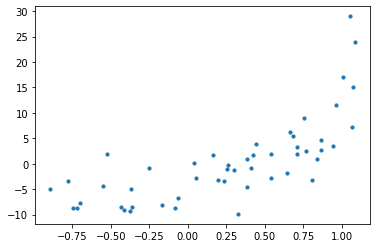

In [39]:
plt.scatter(X_train, y_train, s=10)
plt.show()

## 2) Linear Regression

**This is a reminder that for this assignment, while you may use general utility libraries like numpy and pandas (specifically their matrix computations and data manipulations), pre-existing implementations of the model is prohibited.**

> It is always extremely important to verify the shape of your matrices. We have added assertions to verify them for you. Take a look at the values we assert they _should_ be, and ask yourselves why those are the correct values.

### Q1: linear regression via closed-form ordinary least square solution

Now we will implement polynomial regression for a 15-degree polynomial. As we saw in lectures, linear regression aims to find a solution to the equation:

$$\vec{y} = XW$$

where in the case of an $n$ degree polynomial regression, we choose our $X$ to be:

$$X = \left[1, \vec{x}, \vec{x}^2, \ldots, \vec{x}^n \right]$$

(Note: the powers of $\vec{x}$ in X are an element-wise power, and each $\vec{x}$ takes up a column.)

One way to find $W$ is to solve the following:

$$\underset{W}{\operatorname{argmin}}\lVert \vec{y} - XW\rVert^2$$
 
We will leave out the math behind this, but this should be in the slides. You can go to office hours if you have any questions.

Instead, here we will solve the closed-form ordinary least square solution to this problem (found by setting the gradient to 0) is:

$$W = \left(X^{\operatorname T} X\right)^{-1}X^{\operatorname T}Y$$

Now that we have the building blocks for linear regression, we can code it.

*Note: Make sure to review the slides, do some research, and/or ask for clarification if this doesn't make sense. You must understand the underlying math before being able to implement this properly.*

In [4]:
### YOUR CODE HERE - Create the polynomial matrix ϕ(X) for the train, valid, and test sets

X_train_poly = np.array([[X_train[j][0]**i for i in range(16)] for j in range(len(X_train))])
X_valid_poly = np.array([[X_valid[j][0]**i for i in range(16)] for j in range(len(X_valid))])
X_test_poly = np.array([[X_test[j][0]**i for i in range(16)] for j in range(len(X_test))])

# this checks that your X_poly's have the correct dimensions:
assert (X_train_poly.shape[0] == 50 and X_train_poly.shape[1] == 16)
assert (X_valid_poly.shape[0] == 50 and X_valid_poly.shape[1] == 16)
assert (X_test_poly.shape[0] == 50 and X_test_poly.shape[1] == 16)

### YOUR CODE HERE - Calculate the weighted matrix, save to variable 'W'
# hint: this is your "training" phase, so you should only use X_train_poly and y_train

W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_train_poly), X_train_poly)), np.transpose(X_train_poly)), y_train)

# this checks that W has the correct dimensions:
assert (W.shape[0] == 16 and W.shape[1] == 1)

### YOUR CODE HERE - Make predictions on the training set
# make training set predictions, save to variable 'y_train_pred'
# Hint (for matrix multiplication errors):
# in the math above, the matrix X had dimensions
# (polynomial degree x num samples). However, your X_poly's have
# dimensions (num samples x polynomial degree).

y_train_pred = np.matmul(X_train_poly, W)

# this checks that W has the correct dimensions:
assert (y_train_pred.shape[0] == 50 and y_train_pred.shape[1] == 1)

### YOUR CODE HERE - calculate mean squared error, save to variable 'mse_train'
mse_train = (np.linalg.norm(y_train - np.matmul(X_train_poly, W)))**2 / len(y_train)
print("Training set Mean Squared Error: {}".format(mse_train))

### YOUR CODE HERE - Make predictions on the validation set and calculate the mean squared error.
# make validation set predictions, save to variable 'y_valid_pred'
y_valid_pred = np.matmul(X_valid_poly, W)

# calculate mean squared error, save to variable 'mse_valid'
mse_valid = (np.linalg.norm(y_valid - np.matmul(X_valid_poly, W)))**2 / len(y_valid)
print("Validation set Mean Squared Error: {}".format(mse_valid))

Training set Mean Squared Error: 12.39677454239133
Validation set Mean Squared Error: 20508.242441368613


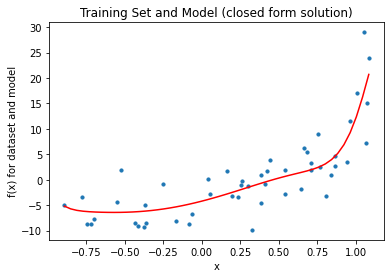

In [41]:
# plot training set using weights
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_train), max(X_train))
plt.plot(x_axis, function(x_axis), 'r', label='15 Degree Polynomial Fit')
plt.scatter(X_train, y_train, s=10, label='Training set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Training Set and Model (closed form solution)")
plt.show()

You should be getting a train MSE of around 12.4 and a validation MSE of around 20508. Something to note here is how much larger the validation set error is than the train error. Keep this in mind as we continue with the assignment.

### Q2: linear regression via gradient descent

We will now implement the same polynomial regression from above, but using gradient descent! In ML, we can't always optimize our cost functions with a closed form solution like in question 1 (it's often too computationally expensive). Thankfully, optimization algorithms, one of which is gradient descent, can help us approximate the minimum of the cost function.

Recall that the cost function for linear regression is:

$$ J(W) = \frac{1}{2m} \cdot \sum_{i=0}^{m}\left (W\transpose x^{(i)} - y^{(i)}\right)^2 $$

Where _i_ represents the sample number out of a total of *m* samples. Notice that the second factor is the sum of the squared errors. The $\frac{1}{m}$ is to calculate the mean of the squared errors, and the $\frac{1}{2}$ is to make the gradient nicer.

When we take the partial derivative of J(W) with respect to weight $W_j$, the jth parameter of vector _W_, we get:

$$ \frac{dJ}{dw_j} = \frac{1}{m}\sum_{i=0}^{m}\left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)} $$

Where $x_j^{(i)}$ is the jth parameter of the vector $x^{(i)}$.

The following is the gradient descent algorithm for linear regression:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for $w_j$ in W:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>$\displaystyle w_j := w_j - \alpha \cdot \frac{1}{m}\sum_{i=0}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)}$
    
We can run the gradient descent update for as many itertions as needed until the amount the gradients change each loop is negligible (less than a given _epsilon_). 

In [18]:
# we start by defining the relevant constants
learning_rate = 0.3
epsilon = 0.001

# weight matrix will be 16x1
# we initialize the weights at 0
W = np.zeros((16, 1))

To implement the gradient descent algorithm, we will need:
1. a function that calculates the gradients of J (the cost function), with respect to each entry in W (i.e. each $w_j$)
2. a function that calculates the change in the values of W after each gradient descent update
3. a while loop that performs gradient descent by caling the above 2 functions, until the change in W < `epsilon`

*Note: training might take one or two minutes*

In [42]:
# function that calculates the gradient
def calculate_grad(X_poly, y, W):
    # let dW represent dJ/dW
    dW = np.zeros((16,1))
    m = len(X_poly)
    y_pred = np.matmul(X_poly, W)
    
    for j, w_j in enumerate(W):
      
        ### YOUR CODE HERE - Calculate dW[j]
        # Hint: You might find 'y_pred' helpful
        # Hint: There is a way to do this without for-looping through every row (sample) in X_poly
        # (And if you're having trouble, you can always go to office hours)
        sum = 0
        for i in range(len(X_poly)):
          sum += (np.matmul(np.transpose(W), X_poly[i]) - y[i]) * X_poly[i][j]
          #print(y_pred[i])
        dW[j] = sum/(len(X_poly))
        #print(dW)
        
        ### ------------------------------

    return dW

# function that caculates the change in W
def calculate_dist(W_prev, W_cur):
    return np.sqrt(np.sum((W_cur - W_prev)**2))

In [43]:
# use the above 2 functions to perform gradient descent
def train_polynomial_regression(X_poly, y, W, learning_rate, epsilon):
  epoch_count = 0
  while True:
      #calculate current gradient
      dW = calculate_grad(X_poly, y, W)
      W_prev = W.copy()

      ### YOUR CODE HERE - update each W[j] using the given learning_rate

      for j in range(len(W)):
        W[j] = W[j] - learning_rate * dW[j]

      ### ------------------------------

      diff = calculate_dist(W_prev, W)
      if (diff < epsilon):
          break

      epoch_count +=1
      # print train error every 50 iterations
      if epoch_count % 200 == 0:
        y_train_pred = np.matmul(X_train_poly, W)
        print('Training set Mean Squared Error: {}'.format(np.power((y_train_pred - y_train), 2).mean()))
  
  print('Training complete.')
  return W

In [44]:
W = train_polynomial_regression(X_train_poly, y_train, W, learning_rate, epsilon)

#calculated MSE
y_valid_pred = np.matmul(X_valid_poly, W)
mse_valid = np.power((y_valid_pred - y_valid), 2).mean()
print('\nValidation set Mean Squared Error: {}'.format(mse_valid))

Training set Mean Squared Error: 16.36592865607797
Training set Mean Squared Error: 16.352410123384914
Training set Mean Squared Error: 16.33970879549805
Training set Mean Squared Error: 16.327717533695715
Training set Mean Squared Error: 16.316359446892765
Training set Mean Squared Error: 16.305570426711178
Training set Mean Squared Error: 16.295296147320144
Training set Mean Squared Error: 16.285490295719775
Training set Mean Squared Error: 16.276113182172093
Training set Mean Squared Error: 16.267130611900292
Training set Mean Squared Error: 16.258512961610105
Training set Mean Squared Error: 16.250234420727445
Training set Mean Squared Error: 16.24227236652587
Training set Mean Squared Error: 16.234606848720517
Training set Mean Squared Error: 16.22722016385482
Training set Mean Squared Error: 16.220096503480594
Training set Mean Squared Error: 16.213221663050785
Training set Mean Squared Error: 16.206582800798355
Training set Mean Squared Error: 16.200168237790102
Training set Mea

Great job! You just implemented polynomial regression in two different ways. You should be getting a final training MSE of around 16.0 and validation MSE of around 69.0. Let's now plot the results of gradient descent.

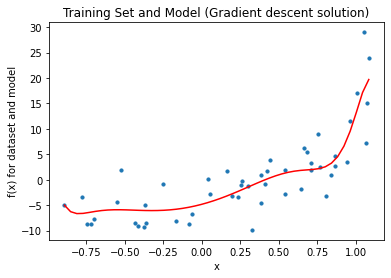

In [10]:
# plot training set using weights from gradient descent
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_train), max(X_train))
plt.plot(x_axis, function(x_axis), 'r', label='15 Degree Polynomial Fit')
plt.scatter(X_train, y_train, s=10, label='Training set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Training Set and Model (Gradient descent solution)")
plt.show()

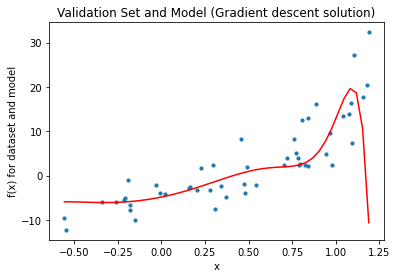

In [11]:
# plot validation set using weights from gradient descent
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_valid), max(X_valid))
plt.plot(x_axis, function(x_axis), 'r', label="15 Degree Polynomial Fit")
plt.scatter(X_valid, y_valid, s=10, label='Validation set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Validation Set and Model (Gradient descent solution)")
plt.show()

You may have also noticed that the results from gradient descent do not perfectly match the results from calculating _W_ using the closed-form solution. Given our low number of data points, in this case finding the minimum of the cost function with gradient descent takes longer than using the approach from Q1. (If you want to get the exact results, just run the training cell again and keep iterating--but it might take a while.)

### Q3: Using your knowledge from the lectures, explain whether the model is overfitting or underfitting the training data and a potential reason why.

The first model (closed-form) is clearly overfitted to the training set, because, the train MSE (around 12) is much smaller than the validation set MSE (around 20508). This means that the model is very good at predicting the training dataset, but can't really predict the validation one. On the other hand, the gradient descent model is sligthly underfitted. Its train MSE is about the same as the closed-form one (around 16), and its validation MSE is a lot better than the closed-form one (around 69). However, when looking at the training plot, the solution seems to be dropping at the end even if we can se the datapoints being a lot higher in the plot. Also, this flaw becomes more apparent in the validation plot since the datapoints extend to a greater x domain towards positive x. In that plot, the datapoints after x=1 continue to increase, but the model drops drastically, completely missing the datapoints.

EDIT: Now that I did Q2, I think that the gradient descent might of been overfitted, because the regularization term is supposed to reduce overfitting by impeding weigths to be too large. Now that I ran the regularized gradient descent, the results are much better and don't dip at x greater than 1.

## 3) Regularization



### Q4: regularized linear regression via gradient descent

One way to address overfitting is to add regularization. In this part of the assignment, we will be adding *L2 regularization* to gradient descent.

Recall that with regularization, the Residual Sum of Squares equation becomes:

$$ RSS(W) =  \sum_{i=0}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right)^2 + \lambda \cdot \sum_{j=1}^{p} w_j^2$$

Where _i_ represents the sample number out of a total of *m* samples and $w_j$ represents the jth parameter of W out of _p_ parameters. The reason j starts at 1 in the regularization sum is because we normally don't regularize the bias term $w_0$.

Making these same changes to our cost function from Q2, we have:

$$ J(W) = \frac{1}{2m}\left[\sum_{i=0}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right)^2 + \lambda \cdot \sum_{j=1}^{p} w_j^2\right]$$

Once again, the $\frac{1}{m}$ is to calculate the mean of the squared errors, and the $\frac{1}{2}$ is to make the gradient nicer.

Now, when we take the partial derivative of J(W) with respect to weight $w_j$, the jth parameter of vector _W_, we get a different result for $w_0$ than for the rest of the parameters:

$$ \begin{aligned} \frac{dJ}{dw_0} &= \frac{1}{m}\sum_{i=1}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)} \\
 \frac{dJ}{dw_j} &= \frac{1}{m}\left(\sum_{i=1}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)}\right) + \frac{\lambda}{m} \cdot w_j \quad \text{for}\ j = 1, 2, \ldots, p \end{aligned} $$

Putting this all together into the gradient descent algorithm for regularized linear regression gives us:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for $w_j$ in W:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>if j = 0<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>$\displaystyle w_j := w_j - \alpha \cdot \frac{1}{m}\sum_{i=1}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>else<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>$\displaystyle w_j := w_j - \alpha \cdot \left(\left(\frac{1}{m}\sum_{i=1}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)}\right) + \frac{\lambda}{m} \cdot w_j\right) $<br>
    
We can run the gradient descent update for as many itertions as needed until the amount the gradients change each loop is negligible (less than a given _epsilon_). 

In [30]:
# we start by defining the relevant constants (the same as Q2)
learning_rate = 0.3
epsilon = 0.001
lambda_value = 0.3

# weight matrix will be 16x1
# we initialize the weights at 0
W = np.zeros((16, 1))

To implement the gradient descent algorithm with regularization, we will need:
1. a function that calculates the gradients of J (the cost function including regularization terms), with respect to each entry in W
2. a function that calculates the change in the values of W after each gradient descent update
3. a while loop that performs gradient descent until the change in W < epsilon

*Note: training might take one or two minutes*

In [20]:
# function that calculates the gradient
def calculate_regularized_grad(X_poly, y, W, lambda_value):
    # let dW store dJ/dW
    dW = np.zeros((16,1))
    m = len(X_poly)
    y_pred = np.matmul(X_poly, W)
    
    for j, w_j in enumerate(W):
        ### YOUR CODE HERE - Calculate dW[j]
        # Hint: You can just copy your implementation from Q2
        # then append the L2 regularization term at the end
        
        sum = 0
        if j == 0:
          for i in range(m):
            sum += (np.matmul(np.transpose(W), X_poly[i]) - y[i]) * X_poly[i][j]
          dW[j] = sum/(m)
        else:
          for i in range(m):
            sum += (np.matmul(np.transpose(W), X_poly[i]) - y[i]) * X_poly[i][j]
          dW[j] = sum / m + lambda_value * W[j] / m
        
    return dW

# function that caculates the change in W
def calculate_dist(W_prev, W_cur):
    return np.sqrt(np.sum((W_cur - W_prev)**2))

In [26]:
# use the above 2 functions to perform regularized gradient descent
def train_regularized_polynomial_regression(X_poly, y, W, learning_rate, epsilon, lambda_value, verbose=True):
  epoch_count = 0
  while True:
      #calculate current gradient
      dW = calculate_regularized_grad(X_poly, y, W, lambda_value)

      W_prev = W.copy()

      ### YOUR CODE HERE - update W[j] using the given learning_rate
      # Hint: This should be the same as your implementation from Q2

      for j in range(len(W)):
        W[j] = W[j] - learning_rate * dW[j]

      diff = calculate_dist(W_prev, W)
      if (diff < epsilon):
          break

      epoch_count +=1
      # print train error every 50 iterations
      if verbose:
        if epoch_count % 100 == 0:
          y_train_pred = np.matmul(X_train_poly, W)
          print('Training set Mean Squared Error: {}'.format(np.power((y_train_pred - y_train), 2).mean()))

  print('Training complete.')
  return W

In [31]:
W = train_regularized_polynomial_regression(X_train_poly, y_train, W, learning_rate, epsilon, lambda_value)
#calculated MSE
y_valid_pred = np.matmul(X_valid_poly, W)
mse_valid = np.power((y_valid_pred - y_valid), 2).mean()
print('\nValidation set Mean Squared Error: {}'.format(mse_valid))

Training set Mean Squared Error: 16.965967070778735
Training set Mean Squared Error: 16.83633608647558
Training set Mean Squared Error: 16.790858584111053
Training set Mean Squared Error: 16.768312236286715
Training set Mean Squared Error: 16.754413386559346
Training set Mean Squared Error: 16.744720960062708
Training set Mean Squared Error: 16.737488451588252
Training set Mean Squared Error: 16.731887762507032
Training set Mean Squared Error: 16.727461872982943
Training complete.

Validation set Mean Squared Error: 41.291617049896814


You should be getting a final training MSE of around 16.7 and validation MSE of around 41.3. Now we plot our training results.

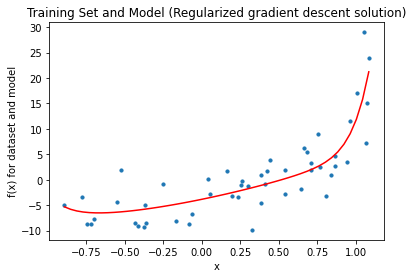

In [32]:
# plot training set using weights from gradient descent
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_train), max(X_train))
plt.plot(x_axis, function(x_axis), 'r', label='15 Degree Polynomial Fit')
plt.scatter(X_train, y_train, s=10, label='Training set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Training Set and Model (Regularized gradient descent solution)")
plt.show()

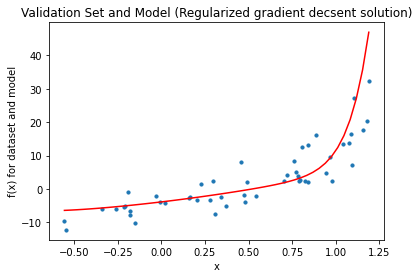

In [33]:
# plot validation set using weights from gradient descent
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_valid), max(X_valid))
plt.plot(x_axis, function(x_axis), 'r', label="15 Degree Polynomial Fit")
plt.scatter(X_valid, y_valid, s=10, label='Validation set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Validation Set and Model (Regularized gradient decsent solution)")
plt.show()

###Q5: Comparing results from Q2 and Q4, which model do you think best generalizes to unseen data? What information do you use to make this decision?

As mentionned in the edit of Q3, this last model has a better MSE for the validation set (41 vs 69) and fits the data better for x greater than 1, which the training set does not have, making these the most exotic datapoints for the model.




# Hyperparameter search

As you may have seen in the lectures, a hyperparameter is a parameter you can choose when selecting the best model. Many examples of hyperparameters can be seen above (eg. learning rate, lambda, degree of the polynomial, etc.)

Here, we seek to find the best *lambda_value* that decreases overfitting as much as possible.

This is where our validation set comes in. We already know that our training algorithm works, but we need to tune lambda via trial-and-error to optimize for a model that performs the best on unseen data. We choose to use a validation set instead of our test set because we need completely new test set data to obtain a truly fair performance metric at the end. To reiterate, hyperparameter-tuning with the validation set means that our model is "fit" (to some extent) to the cross validation data, so measuring performance on the validation set gives our model an unfair advantage.

Run the following cell to loop through a list of potential lambda values to find the best one. This method is called _grid search_.

In [34]:
learning_rate = 0.3
epsilon = 0.001
cross_validation_weights = []
cross_validation_MSEs = []
lambda_list = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]

for lambda_value in lambda_list:
  W = np.zeros((16, 1))
  W = train_regularized_polynomial_regression(X_train_poly, y_train, W,
                                              learning_rate, epsilon,
                                              lambda_value, verbose=False)
  
  #calculated MSE
  y_valid_pred = np.matmul(X_valid_poly, W)
  mse_valid = np.power((y_valid_pred - y_valid), 2).mean()
  print('\nValidation set MSE for {0} lambda: {1}\n'.format(lambda_value, mse_valid))
  
  cross_validation_weights.append(W)
  cross_validation_MSEs.append(mse_valid)

Training complete.

Validation set MSE for 0.001 lambda: 57.445682688352875

Training complete.

Validation set MSE for 0.003 lambda: 43.873481670217274

Training complete.

Validation set MSE for 0.01 lambda: 27.124127154010047

Training complete.

Validation set MSE for 0.03 lambda: 23.21753429639318

Training complete.

Validation set MSE for 0.1 lambda: 32.68844610123968

Training complete.

Validation set MSE for 0.3 lambda: 41.291617049896814

Training complete.

Validation set MSE for 1 lambda: 43.399450225222054

Training complete.

Validation set MSE for 3 lambda: 45.18124736005357



Let's plot the results from our cross validation.

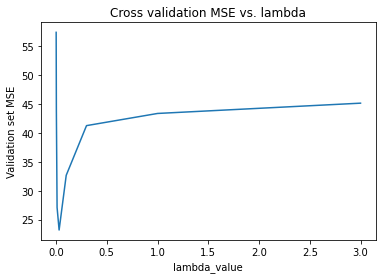

In [37]:
plt.plot(lambda_list, cross_validation_MSEs)
plt.xlabel('lambda_value')
plt.ylabel('Validation set MSE')
plt.title("Cross validation MSE vs. lambda")
plt.show()

We can now pick the best weight from the ones we've trained, and then measure model performance on the test set.

Best lambda: 0.03

Test set MSE: 20.15509981283047



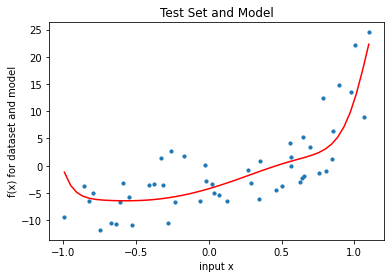

In [38]:
lambda_value = lambda_list[np.argmin(cross_validation_MSEs)]
print('Best lambda: {}'.format(lambda_value))

# pick best weight
W = cross_validation_weights[np.argmin(cross_validation_MSEs)]

# calculate MSE on test set
y_test_pred = np.matmul(X_test_poly, W)
mse_test = np.power((y_test_pred - y_test), 2).mean()
print('\nTest set MSE: {}\n'.format(mse_test))

# plot the results
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_test), max(X_test))
plt.plot(x_axis, function(x_axis), 'r', label="15 Degree Polynomial Fit")
plt.scatter(X_test, y_test, s=10, label='Validation set')
plt.xlabel("input x")
plt.ylabel("f(x) for dataset and model")
plt.title("Test Set and Model")
plt.show()

#### This is the end of your first MAIS 202 assignment. To submit this assignment, ***MAKE SURE ALL THE CELLS IN THIS NOTEBOOK ARE RUN AND THE RESULTS ARE DISPLAYED***, go to "Share > Get Link > Anyone with the link can view" and copy/paste the generated link on MyCourses.